First this file will make a direct comparison between biomass, productivity, and abundance at a fixed species diversity.

Possibly useful:
https://stackoverflow.com/questions/16992038/inline-labels-in-matplotlib

In [1]:
import numpy as np
import biomass as bm

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
# Fix values from a place where the approximations work alright. 
# Want log_10(E/N)=1.5, log_10(N/S)=2.5, roughly, E/N=35, N/S=300

# Set some fixed values
efix = [1e5,1e6]
nfix = [500,5000]
sfix = [10,100]

# Set size of range for n, s, e, when we range over them.
nd = 20 # Set default
ns = nd
nn = nd

# Now set a range for s. Note that I made it smaller, since min N/S ~ 4
srange = np.linspace(sfix[0],sfix[-1],num=ns)
# Set a range for N
nrange = np.logspace(np.log10(nfix[0]),np.log10(nfix[-1]),num=nn)


In [7]:
# For E/B^(3/4) vs. S
BS = np.zeros([len(efix),len(nfix),ns])
for i in range(ns):
    for j,n in enumerate(nfix):
        for k,e in enumerate(efix):
            BS[k,j,i] = bm.biomass({'N':n,'E':e,'S':srange[i]})

# For E/B^(3/4) vs. N
BN = np.zeros([len(efix),len(sfix),nn])
for i in range(nn):
    for j,s in enumerate(sfix):
        for k,e in enumerate(efix):
            BN[k,j,i] = bm.biomass({'N':nrange[i],'E':e,'S':s})

In [26]:
# Set up colors and markers
cmap_n = cm.get_cmap('autumn')
cmap_s = cm.get_cmap('winter')
c_n = [cmap_n(0.1),cmap_n(0.65)]
c_s = [cmap_s(0.1),cmap_s(0.75)]
m = ['-','--']

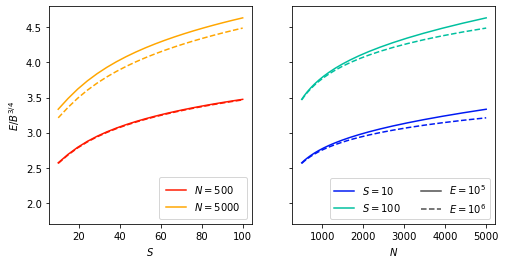

In [54]:
fig,axs = plt.subplots(1,2,figsize=(8,4),sharey=True)

for i,e in enumerate(efix):
    for j,n in enumerate(nfix):
        axs[0].plot(srange,e/BS[i,j,:].T**(3/4),c=c_n[j],ls=m[i],label='N = {}, E = {:.0e}'.format(n,e))
    for k,s in enumerate(sfix):
        axs[1].plot(nrange,e/BN[i,k,:].T**(3/4),c=c_s[k],ls=m[i],label='S = {}, E = {:.0e}'.format(s,e))

axs[0].set_ylabel(r'$E/B^{3/4}$')
axs[0].set_xlabel(r'$S$')
axs[1].set_xlabel(r'$N$')

for ax in axs:
    ax.set_ylim(1.7,4.8)
#    ax.legend(loc='lower right')

# Now set up legend
# Plot a bunch of empty points. Not sure if this is the best way, but it's how I'm doing it!
leg = {}
for cn,cs,mm in zip(c_n,c_s,m):
    # For N
    leg[cn], = ax.plot([],[],c=cn,linestyle=m[0])
    # For S
    leg[cs], = ax.plot([],[],c=cs,linestyle=m[0])
    # For linestyle (E)
    leg[mm], = ax.plot([],[],c='0.3',linestyle=mm)

axs[0].legend([leg[s] for s in c_n],['$N = 500$', '$N = 5000$'],loc='lower right',borderpad=0.65)
axs[1].legend([leg[s] for s in c_s+m],
              ['$S = 10$', '$S = 100$','$E = 10^5$','$E = 10^6$'],
              loc='lower right',ncol=2)
    
fig.savefig("eb34.pdf")

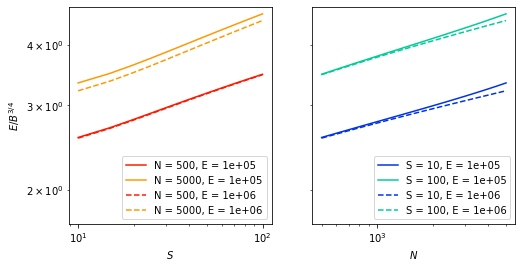

In [16]:
# Reveal the approximate power law
fig,axs = plt.subplots(1,2,figsize=(8,4),sharey=True)

for i,e in enumerate(efix):
    for j,n in enumerate(nfix):
        axs[0].loglog(srange,e/BS[i,j,:].T**(3/4),c=c_n[j],ls=m[i],label='N = {}, E = {:.0e}'.format(n,e))
    for k,s in enumerate(sfix):
        axs[1].loglog(nrange,e/BN[i,k,:].T**(3/4),c=c_s[k],ls=m[i],label='S = {}, E = {:.0e}'.format(s,e))

axs[0].set_ylabel(r'$E/B^{3/4}$')
axs[0].set_xlabel(r'$S$')
axs[1].set_xlabel(r'$N$')

for ax in axs:
    ax.set_ylim(1.7,4.8)
    ax.legend(loc='lower right')
    
fig.savefig("eb34_loglog.pdf")

# Comparing to analytic predictions

In [37]:

from scipy.optimize import root_scalar
def beta_eq(beta,s,n):
    return beta*np.log(1/beta)-s/n
    
def beta_solve(s,n):
    sol = root_scalar(beta_eq,args=(s,n),x0=0.0001,x1=0.01)#,bounds=(np.exp(-30),0.1),method='bounded')
    return sol.root

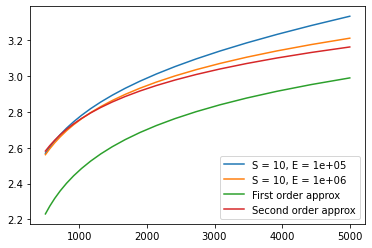

In [38]:
plt.plot(nrange,efix[0]/BN[0,0,:].T**(3/4),label='S = {}, E = {:.0e}'.format(sfix[0],efix[0]))
plt.plot(nrange,efix[1]/BN[1,0,:].T**(3/4),label='S = {}, E = {:.0e}'.format(sfix[0],efix[1]))
#plt.plot(nrange,efix[0]/BN[0,1,:].T**(3/4),label='S = {}, E = {:.0e}'.format(sfix[1],efix[0]))
#plt.plot(nrange,efix[1]/BN[1,1,:].T**(3/4),label='S = {}, E = {:.0e}'.format(sfix[1],efix[1]))

beta_arr = np.array([beta_solve(sfix[0],ni) for ni in nrange])
plt.plot(nrange,sfix[0]**(1/4)*np.log(1/beta_arr)**(3/4)/(4.17)**(3/4),label='First order approx')
plt.plot(nrange,sfix[0]**(1/4)*np.log(1/beta_arr)**(3/4)/(4.17*(1-1.16*beta_arr**(1/3)))**(3/4),label='Second order approx')
plt.legend()

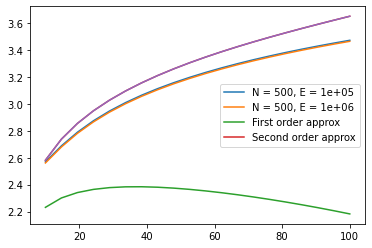

In [44]:
plt.plot(srange,efix[0]/BS[0,0,:].T**(3/4),label='N = {}, E = {:.0e}'.format(nfix[0],efix[0]))
plt.plot(srange,efix[1]/BS[1,0,:].T**(3/4),label='N = {}, E = {:.0e}'.format(nfix[0],efix[1]))
#plt.plot(srange,efix[0]/BS[0,1,:].T**(3/4),label='N = {}, E = {:.0e}'.format(nfix[1],efix[0]))
#plt.plot(srange,efix[1]/BS[1,1,:].T**(3/4),label='N = {}, E = {:.0e}'.format(nfix[1],efix[1]))

beta_arr = np.array([beta_solve(si,nfix[0]) for si in srange])
plt.plot(srange,srange**(1/4)*np.log(1/beta_arr)**(3/4)/(4.17)**(3/4),label='First order approx')
plt.plot(srange,srange**(1/4)*np.log(1/beta_arr)**(3/4)/(4.17*(1-1.16*beta_arr**(1/3)))**(3/4),label='Second order approx')
plt.plot(srange,srange**(1/4)*(np.log(1/beta_arr)/4.17)**(3/4)*(1-1.16*beta_arr**(1/3))**(-3/4))

plt.legend()